In [68]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import copy
sns.set_style('white')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=1.5, style="white", rc={"lines.linewidth": 1.0})

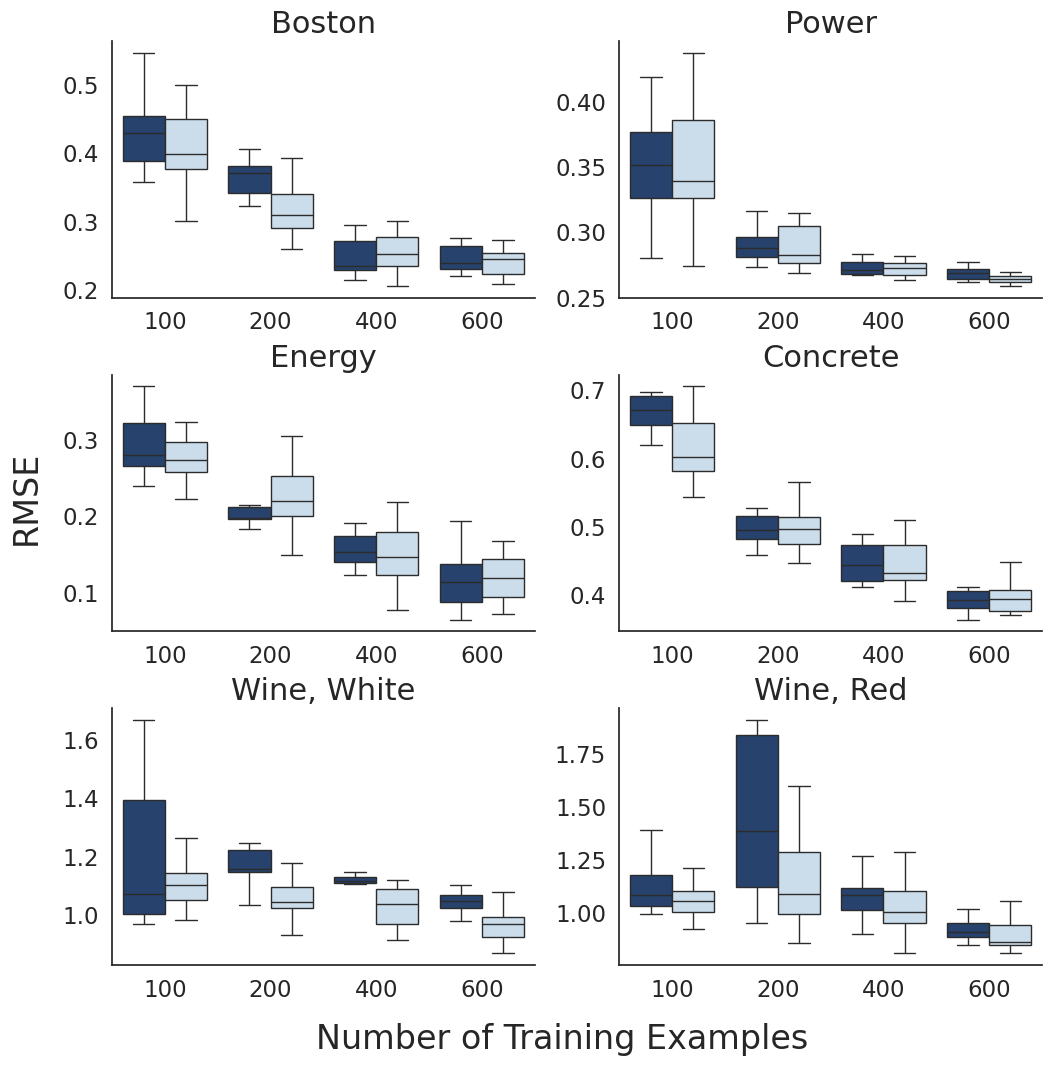

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import numpy to handle floating-point comparisons

# Load the dataset
df = pd.read_pickle("exact_uci_df.pkl")

# Set the font size
fs = 24

# Define the function to plot individual boxplots for each dataset
def PlotAx(ax, dset, m=0.5):
    # Filter data by the dataset name
    sub_df = df[df['Dataset'] == dset]
    
    # Separate filtering for 'mll' and 'cmll'
    if 'mll' in sub_df['Type'].values:  # If 'mll' exists in the data
        sub_df_mll = sub_df[sub_df['Type'] == 'mll']  # Filter for 'mll'
        sub_df_cmll = sub_df[sub_df['Type'] == 'cmll']  # Filter for 'cmll'
        
        # For 'mll', we will use m=0.0
        sub_df_mll = sub_df_mll[np.isclose(sub_df_mll['m'], 0.0)]  # mll = m = 0.0
        
        # For 'cmll', we will use m in the range [0.0, 0.5]
        sub_df_cmll = sub_df_cmll[(sub_df_cmll['m'] >= 0.0) & (sub_df_cmll['m'] <= 0.5)]  # cmll = m between [0.0, 0.5]
        
        # Combine 'mll' and 'cmll' data
        sub_df_final = pd.concat([sub_df_mll, sub_df_cmll])

        # Check if we have any data for the given m
        if sub_df_final.empty:
            print(f"No data available for dataset '{dset}' and m={m}")
            return None
        
        # Check which types are available for the given m value
        available_types = sub_df_final['Type'].unique()
        # print(f"Available types for dataset '{dset}' and m={m}: {available_types}")
        
        # Create the boxplot
        box = sns.boxplot(
            x='N', 
            y='RMSE', 
            hue='Type', 
            data=sub_df_final, 
            ax=ax, 
            showfliers=False
        )
        
        # Adjust the transparency of the boxplot patches
        for patch in box.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .75))  # Set the transparency
        
        # Remove the top and right spines for cleaner appearance
        sns.despine()
        
        # Set the title with specific formatting based on the dataset
        ax.set_title(dset.capitalize(), fontsize=fs-2)
        if dset == 'winewhite':
            ax.set_title("Wine, White", fontsize=fs-2)
        elif dset == "winered":
            ax.set_title("Wine, Red", fontsize=fs-2)
        
        # Remove x and y labels for a cleaner look
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        # Remove the legend frame and set appropriate title for legend
        ax.legend([], [], frameon=False)
        
        # Check if artists exist and handle the legend accordingly
        artists = box.artists
        # print(f"Number of artists in the box for dataset '{dset}': {len(artists)}")  # Debugging output to see the number of artists
        
        # If there are at least two artists, plot the legend with both types
        if len(artists) >= 2:
            plt.legend([artists[0], artists[1]], ['MLL', "CMLL"], fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
        elif len(artists) == 1:
            # If only one artist exists (only CMLL), plot legend with the single type
            plt.legend([artists[0]], ['CMLL'], fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
        # else:
            # print(f"No boxplot artists found for dataset: {dset} and m={m}")
        
    return box

# Create subplots with a 3x2 grid layout
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)

# Plot the individual datasets
PlotAx(ax[0, 0], 'boston', m=0.5)
PlotAx(ax[0, 1], 'power', m=0.5)
PlotAx(ax[1, 0], 'energy', m=0.5)
PlotAx(ax[2, 0], 'winewhite', m=0.5)
PlotAx(ax[2, 1], 'winered', m=0.5)
box = PlotAx(ax[1, 1], 'concrete', m=0.5)

# Add axis labels for the whole figure
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs)

# Optionally, save the figure
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')

# Show the plot
plt.show()


In [70]:
df = pd.read_pickle("exact_uci_df.pkl")

In [71]:
def PlotAx(ax, dset, m=0.5):
    sub_df = df[df['Dataset']==dset]
    box = sns.boxplot(x='N', y='RMSE', hue='Type', data=sub_df[sub_df['m'].isin(['NA', m])],
               ax=ax, showfliers = False)
    for patch in box.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    sns.despine()
    ax.set_title(dset.capitalize(), fontsize=fs-2)
    if dset == 'winewhite':
        ax.set_title("Wine, White", fontsize=fs-2)
    elif dset == "winered":
        ax.set_title("Wine, Red", fontsize=fs-2)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    return box

IndexError: list index out of range

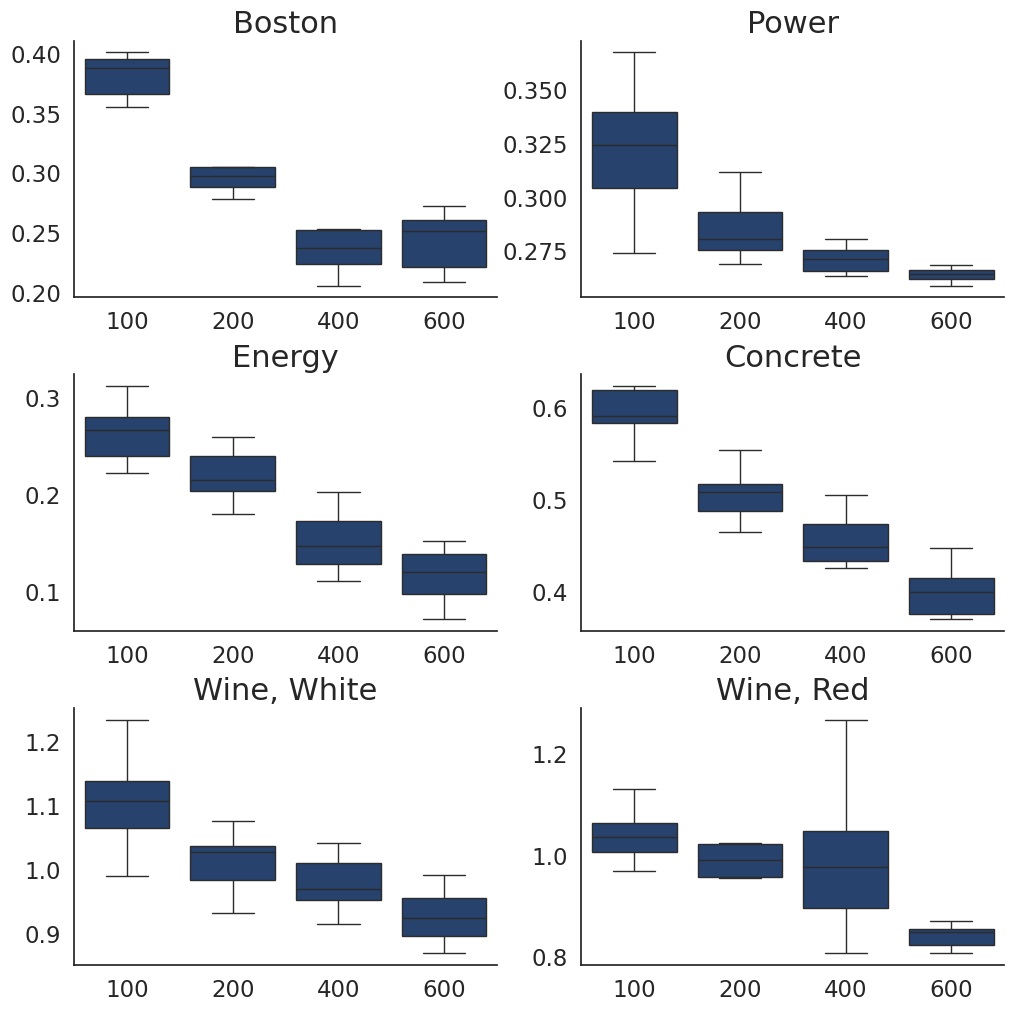

In [72]:
fig, ax = plt.subplots(3,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx(ax[0,0], 'boston')
PlotAx(ax[0,1], 'power')
PlotAx(ax[1,0], 'energy')
PlotAx(ax[2,0], 'winewhite')
PlotAx(ax[2,1], 'winered')
box = PlotAx(ax[1,1], 'concrete')

plt.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')

Filtered data for energy:
  Dataset    N    m      RMSE  Type
0  energy  600  0.5  0.130746  cmll
1  energy  600  0.5  0.152043  cmll
2  energy  600  0.5  0.124713  cmll
3  energy  600  0.5  0.114469  cmll
4  energy  600  0.5  0.095506  cmll
Filtered data for power:
   Dataset    N    m      RMSE Type
50   power  600  0.0  0.261721  mll
51   power  600  0.0  0.268397  mll
52   power  600  0.0  0.265309  mll
53   power  600  0.0  0.268501  mll
54   power  600  0.0  0.276657  mll
Filtered data for boston:
    Dataset    N    m      RMSE  Type
110  boston  200  0.5  0.336984  cmll
111  boston  200  0.5  0.351333  cmll
112  boston  200  0.5  0.288253  cmll
113  boston  200  0.5  0.305109  cmll
114  boston  200  0.5  0.303660  cmll
Filtered data for concrete:
     Dataset    N    m      RMSE  Type
10  concrete  100  0.1  0.576080  cmll
11  concrete  100  0.1  0.705535  cmll
12  concrete  100  0.1  0.608698  cmll
13  concrete  100  0.1  0.653991  cmll
14  concrete  100  0.1  0.882710  cmll
F

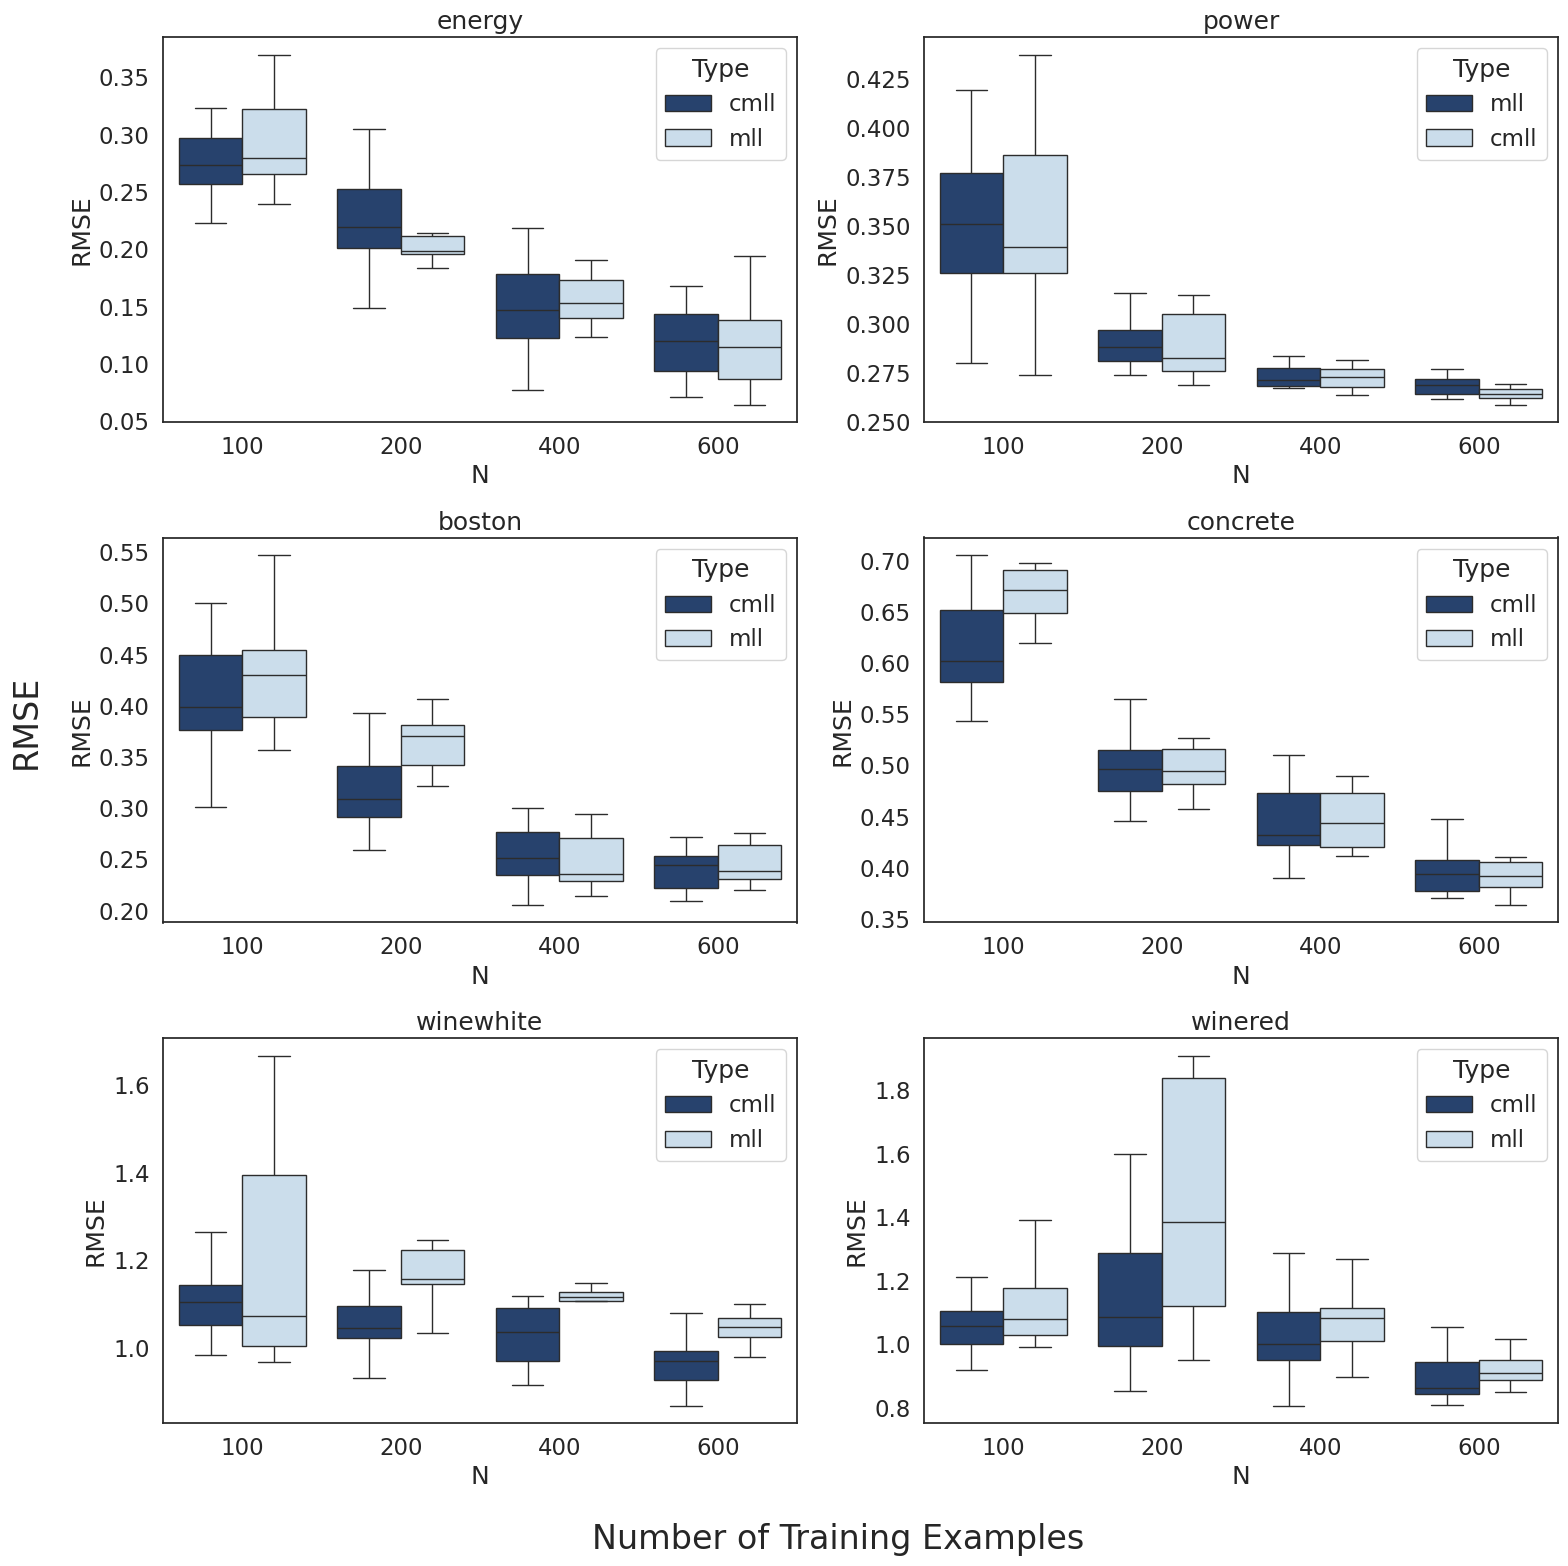

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def PlotAx(ax, dset):
    # Filter the dataframe for the given dataset
    sub_df = df[df['Dataset'] == dset]
    
    # Print the filtered dataframe for debugging
    print(f"Filtered data for {dset}:")
    print(sub_df.head())
    
    # Use all the data (no m filtering)
    filtered_sub_df = sub_df
    
    # If no data is left, print a message and return
    if filtered_sub_df.empty:
        print(f"No data available for {dset}")
        return None

    # Create the box plot
    box = sns.boxplot(
        x='N', y='RMSE', hue='Type', 
        data=filtered_sub_df,
        ax=ax, showfliers=False
    )
    ax.set_title(dset)
    return box

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.3)
fs = 24

# Plot each dataset without the 'm' filter
PlotAx(ax[0, 0], 'energy')
PlotAx(ax[0, 1], 'power')
PlotAx(ax[1, 0], 'boston')
PlotAx(ax[1, 1], 'concrete')
PlotAx(ax[2, 0], 'winewhite')
box = PlotAx(ax[2, 1], 'winered')

# Check if box.artists has at least 2 items before accessing
if box and len(box.artists) >= 2:
    plt.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
               fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
else:
    print("Warning: Not enough elements in box.artists for legend")

# Add labels
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs)
plt.show()


## M plotter

In [73]:
sns.set_style('white')
# style.use('whitegrid')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=2.0, style="white", rc={"lines.linewidth": 2.0})

In [74]:
keep_dats = ['boston', 'power', 'energy', 'concrete', 'winewhite', 'winered']
temp_df = df[(df['Type']=='cmll') & (df['N']==400) & (df['Dataset'].isin(keep_dats))]

In [75]:
print(temp_df.head())
print(temp_df.isnull().sum())


    Dataset    N    m      RMSE  Type
20  winered  400  0.5  0.982702  cmll
21  winered  400  0.5  0.990220  cmll
22  winered  400  0.5  0.958975  cmll
23  winered  400  0.5  1.097487  cmll
24  winered  400  0.5  1.266060  cmll
Dataset    0
N          0
m          0
RMSE       0
Type       0
dtype: int64


In [76]:
# temp_df = temp_df.dropna(subset=['Dataset', 'RMSE'])
# print(temp_df['Dataset'].unique())

In [77]:
# temp_df['norm_RMSE'] = temp_df.groupby('Dataset')['RMSE'].transform(lambda x: (x - x.mean()) / x.std())
# grouped = temp_df.groupby('Dataset')['RMSE']
# print(grouped.size())  # Check the size of each group


In [78]:
# mean_df = temp_df[['Dataset', 'norm_RMSE', 'm']].groupby(['Dataset', 'm']).mean()
# print(temp_df['m'].unique())


In [79]:
# # First, clean the data (drop rows with NaNs in relevant columns)
# temp_df = temp_df.dropna(subset=['Dataset', 'RMSE'])

# # Check the unique values in the 'Dataset' and 'm' columns
# print(temp_df['Dataset'].unique())
# print(temp_df['m'].unique())

# # Normalize RMSE by grouping 'Dataset'
# temp_df['norm_RMSE'] = temp_df.groupby('Dataset')['RMSE'].transform(lambda x: (x - x.mean()) / x.std())

# # Check the resulting DataFrame
# print(temp_df.head())

# # Now compute the mean RMSE for each Dataset and m combination
# mean_df = temp_df[['Dataset', 'norm_RMSE', 'm']].groupby(['Dataset', 'm']).mean()

# # Print mean_df to check if the aggregation is correct
# print(mean_df.head())


In [80]:
# temp_df['normRMSE'] = 0.
temp_df.insert(0, "norm_RMSE", temp_df[['Dataset', 'RMSE']].groupby('Dataset').transform(lambda x: (x - x.mean()) / x.std()).copy())
mean_df = temp_df[['Dataset', 'norm_RMSE', 'm']].groupby(['Dataset', 'm']).mean()

/tmp/ipykernel_915465/2768893838.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=50, palette=pal, alpha=0.25)
/tmp/ipykernel_915465/2768893838.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=None, palette=pal, alpha=1., legend=False)


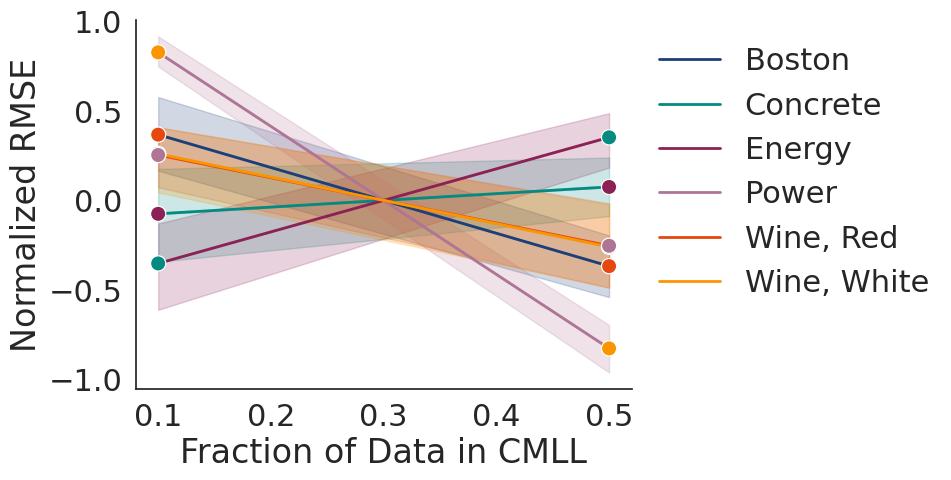

In [ ]:
from matplotlib.lines import Line2D
pal = [palette[0], palette[2], palette[4], palette[5], palette[6], palette[7]]
sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=50, palette=pal, alpha=0.25)
sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=None, palette=pal, alpha=1., legend=False)
sns.scatterplot(x='m', y="norm_RMSE", hue='Dataset', data=mean_df, s=120, legend=False, zorder=4, palette=pal, alpha=1.)

custom_lines = [Line2D([0], [0], color=palette[0], lw=2),
                Line2D([0], [0], color=palette[2], lw=2),
                Line2D([0], [0], color=palette[4], lw=2),
                Line2D([0], [0], color=palette[5], lw=2),
                Line2D([0], [0], color=palette[6], lw=2),
                Line2D([0], [0], color=palette[7], lw=2)]
                
plt.ylabel("Normalized RMSE")
plt.xlabel("Fraction of Data in CMLL")
plt.legend(custom_lines, ['Boston', "Concrete", "Energy", "Power", "Wine, Red", "Wine, White"], bbox_to_anchor=(1., 1.), frameon=False)
# plt.savefig("./m-effect.pdf", bbox_inches='tight')
sns.despine()

## NLL

In [ ]:
nll_df = pd.read_pickle("exact_nll_df.pkl")

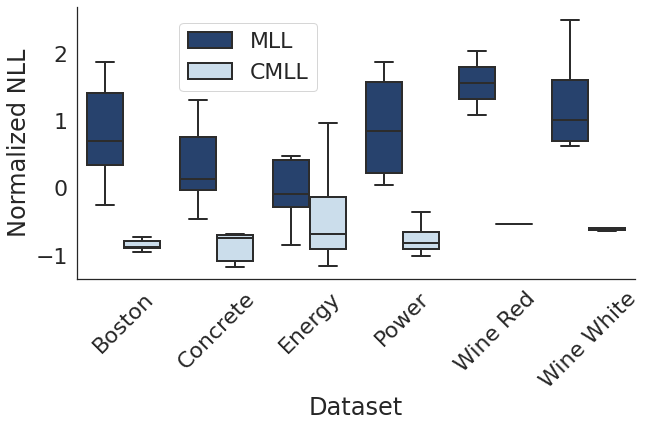

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x='Dataset', y='norm_NLL', hue='Type', data=nll_df, showfliers=False)
ax.set_xticklabels(["Boston", "Concrete", "Energy", "Power", "Wine Red", "Wine White"], rotation=45)
ax.set_ylabel("Normalized NLL")
sns.despine()

ax.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=fs-2, bbox_to_anchor=(0.45, 0.65))

plt.savefig("./dkl-nlls.pdf", bbox_inches='tight')